### Text Mining Homework 5

Regarding first 2,000 overviews of movie review data (movies_metadata.csv), after undergoing the following preprocessing, you want to do cluster analysis for movie titles. Create a TF-IDF vector using the method below and answer the questions below

```
[Preprocessing]
[Step 1] Null Remove row with value
[Step 2] Convert non-alphabetic characters to spaces
[Step 3] Convert to lower case
[Step 4] Create TF-IDF considering stopwords
```

#### Problem 1

Please answer the questions below regarding the movie [Jumanji]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

data = pd.read_csv('../Data/movies_metadata.csv', engine = 'python')
data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


Check if there is null in building TF-IDF

In [2]:
data['overview'].isnull().sum()

954

Remove Null from overview

In [3]:
data['overview'] = data['overview'].fillna('')  # fillna(""): delete null
data['overview'].isnull().sum() #  Null check again

0

In [4]:
data = data[:2000] # select 2000 review data

remove non-alphabetic characters and spaces

In [5]:
overview_list = []

for i in range(len(data['overview'])):
    overview1 = re.sub('[^a-zA-z]',' ',data['overview'][i])
    overview2 = overview1.lower()
    overview_list.append(overview2)

In [6]:
titles = data['original_title']
synopses = overview_list

Vectorize using TF-IDF

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words = 'english')
tfidf_matrix = tfidf.fit_transform(synopses)

make movie indeces

In [8]:
indices = pd.Series(data.index, index = data['title']).drop_duplicates()

**1.1**  Find how many movies are in the same cluster as the movie jumanji using Euclidean similarity and K-means (k=10) method.

In [9]:
from sklearn.cluster import KMeans

num_cluster = 10
kmeans_model = KMeans(n_clusters = num_cluster, 
                      random_state = 42)

%time kmeans_model.fit(tfidf_matrix)

/Users/junghunlee/anaconda3/envs/Webscraping/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


CPU times: user 1.58 s, sys: 1.45 s, total: 3.03 s
Wall time: 508 ms


KMeans(n_clusters=10, random_state=42)

Kmeans clusters set a distance as euclidean to default. and now, we check a clustered labels.

In [10]:
clusters = kmeans_model.labels_.tolist()
clusters[:10]

[8, 6, 2, 1, 0, 8, 7, 2, 1, 6]

In [11]:
films = {'title': titles, 
         'synopsis': synopses, 
         'cluster': clusters}
frame = pd.DataFrame(films)
number_frame = pd.DataFrame(frame['cluster'].value_counts()).reset_index()
number_frame

,cluster,count
0,6,455
1,8,242
2,7,224
3,3,182
4,4,179
5,2,176
6,1,162
7,5,150
8,0,142
9,9,88


In [12]:
print(f"The cluster number with jumanji is {frame[frame['title']=='Jumanji']['cluster'].to_list()[0]} and the number of movie in this cluster is {number_frame[number_frame['cluster'] == frame[frame['title']=='Jumanji']['cluster'].to_list()[0]]['count'].to_list()[0]}")

The cluster number with jumanji is 6 and the number of movie in this cluster is 455


**1.2** Find how many movies are in the same cluster as the movie Jumanji using Euclidean similarity and hierarchical clustering (ward, k=10) method.

In [13]:
from sklearn.cluster import AgglomerativeClustering

agg_cluster = AgglomerativeClustering(n_clusters = num_cluster,
                                      metric = 'euclidean',
                                      linkage = 'ward')
%time agg_cluster.fit(tfidf_matrix.toarray())

CPU times: user 7.95 s, sys: 382 ms, total: 8.33 s
Wall time: 7.84 s


AgglomerativeClustering(metric='euclidean', n_clusters=10)

In [14]:
result1 = agg_cluster.fit_predict(tfidf_matrix.toarray())

In [15]:
films = {'title': titles, 
         'synopsis': synopses, 
         'cluster': result1}
frame = pd.DataFrame(films)
frame['cluster'].value_counts(films)
number_frame = pd.DataFrame(frame['cluster'].value_counts()).reset_index()
number_frame

,cluster,count
0,2,1568
1,1,152
2,4,129
3,0,64
4,3,30
5,6,30
6,8,8
7,5,8
8,9,7
9,7,4


In [16]:
print(f"The cluster number with jumanji is {frame[frame['title']=='Jumanji']['cluster'].to_list()[0]} and the number of movie in this cluster is {number_frame[number_frame['cluster'] == frame[frame['title']=='Jumanji']['cluster'].to_list()[0]]['count'].to_list()[0]}")

The cluster number with jumanji is 2 and the number of movie in this cluster is 1568


**1.3** Recommend 3 movies that are closest to the movie Jumanji using cosine similarity 

In [17]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [18]:
def get_recommendations(title, 
                        cosine_sim = cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[0:10]  
    movie_indices = [i[0] for i in sim_scores]
    return data['title'].iloc[movie_indices]

print(get_recommendations('Jumanji')[1:4])

1506    The Innocent Sleep
8             Sudden Death
363               Maverick
Name: title, dtype: object


#### Problem 2

We intend to analyze using a topic model based on LDA . Here, the max features of the TF -IDF vector are limited to 1000 and applied. Answer the questions below

In [19]:
import urllib.request
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

vectorizer = TfidfVectorizer(stop_words = 'english', 
                             max_features = 1000)
X = vectorizer.fit_transform(frame['synopsis'])

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/junghunlee/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**2.1** Apply the topic model of the Sklearn library to find where the first document falls under topics 0 to 9. Apply (designate 10 topics , random state = 777, learning method = online, max iter = 5)

In [20]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(
    n_components = 10,
    learning_method = 'online',
    random_state = 777,
    max_iter = 5
)

%time lda_top = lda_model.fit_transform(X)

CPU times: user 537 ms, sys: 2.52 ms, total: 539 ms
Wall time: 559 ms


In [21]:
lda_top[0]

array([0.02177742, 0.16062671, 0.0217929 , 0.02177742, 0.66513291,
       0.02177748, 0.02177742, 0.02177765, 0.02177742, 0.02178268])

The Topic of first document is index 4 and it's estimated value is about 0.6651

**2.2** Print the top 5 words for each of the 10 topics

In [22]:
terms = vectorizer.get_feature_names_out()

def get_topics(components, feature_names, n = 5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), 
              [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])

get_topics(lda_model.components_, terms)

Topic 1: [('alex', 5.8), ('tom', 0.93), ('criminal', 0.48), ('receives', 0.37), ('mexico', 0.16)]
Topic 2: [('murder', 12.78), ('police', 8.91), ('detective', 8.08), ('angeles', 7.91), ('drug', 7.88)]
Topic 3: [('max', 8.32), ('serial', 8.04), ('killer', 6.58), ('teacher', 6.11), ('war', 5.8)]
Topic 4: [('park', 2.63), ('sir', 0.15), ('nuclear', 0.13), ('pilot', 0.12), ('officer', 0.12)]
Topic 5: [('life', 38.19), ('young', 37.16), ('new', 35.31), ('family', 34.61), ('love', 32.92)]
Topic 6: [('nazi', 6.31), ('christmas', 5.95), ('planet', 4.28), ('musical', 4.17), ('computer', 3.32)]
Topic 7: [('oliver', 3.05), ('fred', 0.25), ('quest', 0.16), ('talking', 0.11), ('adam', 0.11)]
Topic 8: [('alien', 4.34), ('shakespeare', 3.5), ('genius', 3.19), ('fashion', 2.68), ('uses', 1.94)]
Topic 9: [('fashion', 0.24), ('week', 0.17), ('paris', 0.13), ('following', 0.12), ('photographer', 0.11)]
Topic 10: [('king', 11.61), ('space', 5.18), ('ship', 4.83), ('life', 4.46), ('president', 4.39)]


**2.3** Use the show_perflexity function of the lecture notes to create a graph with the number of topic candidates from 2 to 30

In [23]:
def show_perplexity(vectorizer, 
                    start = 1, 
                    end = 30, 
                    max_iter = 5, 
                    topic_word_prior = 0.1,
                    doc_topic_prior = 1.0):
    iter_num = []
    per_value = []

    for i in range(start, end + 1):
        lda = LatentDirichletAllocation(n_components = i, max_iter = max_iter,
                                        topic_word_prior = topic_word_prior,
                                        doc_topic_prior =doc_topic_prior,
                                        learning_method = 'batch', n_jobs = -1,
                                        random_state = 7)
        lda.fit(vectorizer)
        iter_num.append(i)
        pv = lda.perplexity(vectorizer)
        per_value.append(pv)
        print(f'n_components: {i}, perplexity: {pv:0.3f}')

    plt.plot(iter_num, per_value, 'g-')
    plt.grid(False)
    plt.title('perplexity', fontsize = 12, fontfamily = 'Serif')
    plt.show()
    return start + per_value.index(min(per_value))

n_components: 1, perplexity: 1174.844
n_components: 2, perplexity: 1684.947
n_components: 3, perplexity: 2197.446
n_components: 4, perplexity: 2714.340
n_components: 5, perplexity: 3202.668
n_components: 6, perplexity: 3679.698
n_components: 7, perplexity: 4098.835
n_components: 8, perplexity: 4499.038
n_components: 9, perplexity: 4885.192
n_components: 10, perplexity: 5230.669
n_components: 11, perplexity: 5558.037
n_components: 12, perplexity: 5863.272
n_components: 13, perplexity: 6142.490
n_components: 14, perplexity: 6372.227
n_components: 15, perplexity: 6620.773
n_components: 16, perplexity: 6843.675
n_components: 17, perplexity: 7059.993
n_components: 18, perplexity: 7278.054
n_components: 19, perplexity: 7515.560
n_components: 20, perplexity: 7715.755
n_components: 21, perplexity: 7880.316
n_components: 22, perplexity: 8060.534
n_components: 23, perplexity: 8226.794
n_components: 24, perplexity: 8411.936
n_components: 25, perplexity: 8579.025
n_components: 26, perplexity: 8773

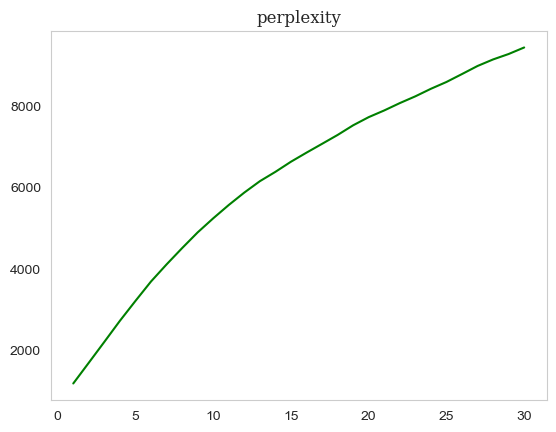

1

In [24]:
show_perplexity(X)